In [1]:
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
np.random.seed(2)

In [3]:
pop_million_points, ignore_classes = make_gaussian_quantiles(n_samples=1000000, n_features = 2, cov=1, n_classes=1)

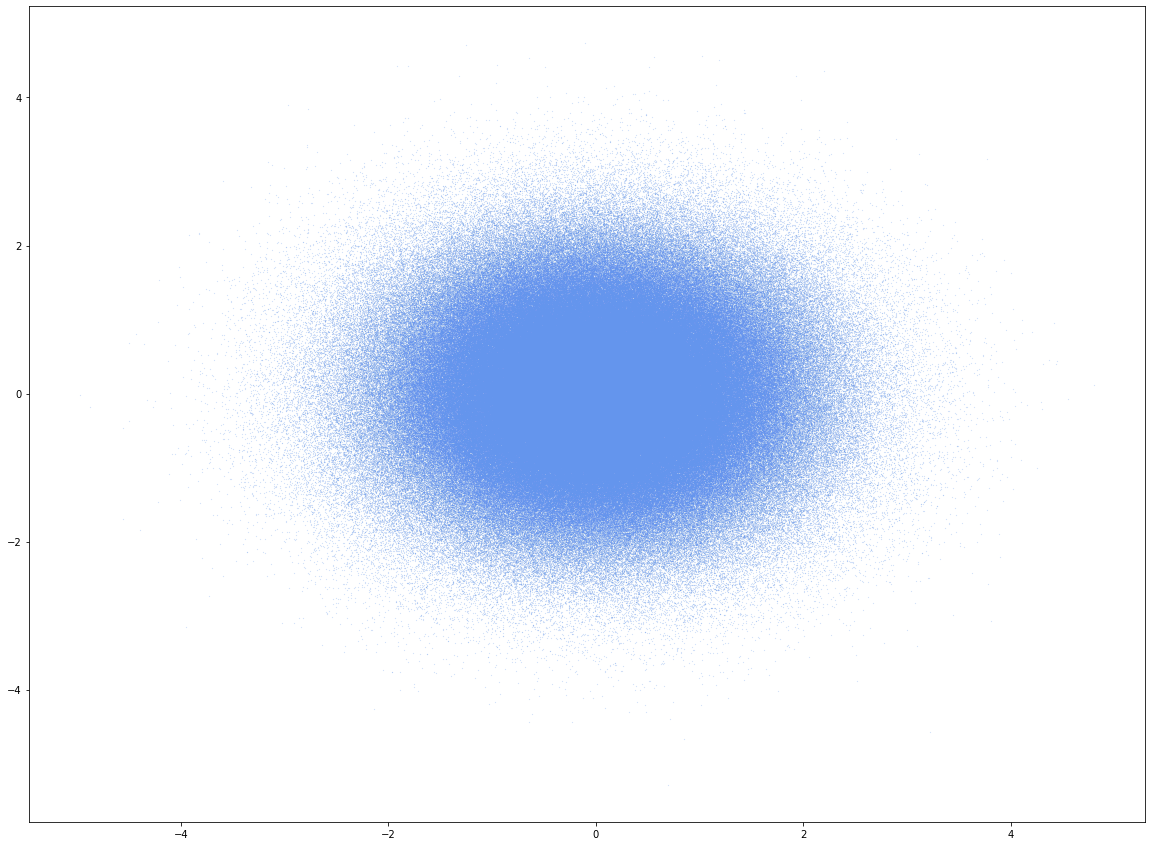

In [4]:
plt.figure(figsize=(20,15))
plt.scatter(pop_million_points[:,0], pop_million_points[:,1], s=.01, color='cornflowerblue')
plt.show()

In [5]:
under_1_pop = 0
for i in pop_million_points:
    if -1 <= i[0] <= 1:
        under_1_pop += 1

In [6]:
rand10 = np.random.choice(range(1000000), 10)
sample10 = np.array([pop_million_points[i] for i in rand10])

In [7]:
under_1_std_10 = 0
over_1_std_10 = 0
for i in sample10:
    if -1 <= i[0] <= 1:
        under_1_std_10 += 1
    else: 
        over_1_std_10 += 1

In [8]:
under_1_std_10

7

In [9]:

over_1_std_10

3

In [10]:
rand100 = np.random.choice(range(1000000), 100)
sample100 = np.array([pop_million_points[i] for i in rand100])

In [11]:
under_1_std_100 = 0
over_1_std_100 = 0
for i in sample100:
    if -1 <= i[0] <= 1:
        under_1_std_100 += 1
    else: 
        over_1_std_100 += 1

In [12]:
under_1_std_100

68

In [13]:
over_1_std_100

32

# Proof that increasing sample size increases standard deviation, which converges to the true population standard deviation. Bessel's correction helps smaller samples get larger standard deviations than they would otherwise, hence N-1.

## Sample mean gets closer to true population mean with larger sample. This should be intuitive.  Larger samples contain more points from the population. In a normally distributed population, points close to the mean are more common than points farther away from the mean. Therefore, larger samples will have *a more frequent opportunity, because of those greater encounters with unbiased points, to counteract their biased points*, and so larger samples will have a sample mean closer to the true population mean.  

In [14]:
sample10[:,0].mean()

-0.2455270679272077

In [15]:
sample100[:,0].mean()

-0.00841692225663711

In [16]:
pop_million_points[:,0].mean()

0.0003530861491868483

## Standard deviation increases, getting closer to the true standard deviation (which in this case is 1.0, for the Normal distribution) as sample size gets larger. Applying Bessel's Correction (n-1) seems to help both 'biased' samples (calculated using n) get a bit closer to the true standard deviation, hence why 'n-1' is the unbiased estimate. 

In [17]:
np.std(sample10[:,0]) # 10-point sample without the correction, using just n

0.928137866216869

In [18]:
np.std(sample10[:,0], ddof=1) # 10-point sample with the correction, using n-1

0.9783432132979842

In [19]:
np.std(sample100[:,0]) # 100-point sample without the correction, using just n

0.9571342019948732

In [20]:
np.std(sample100[:, 0], ddof=1) # 100-point sample with the correction, using n-1

0.9619560672827967

In [21]:
np.std(pop_million_points[:,0]) # the true population standard deviation

0.999754203015716

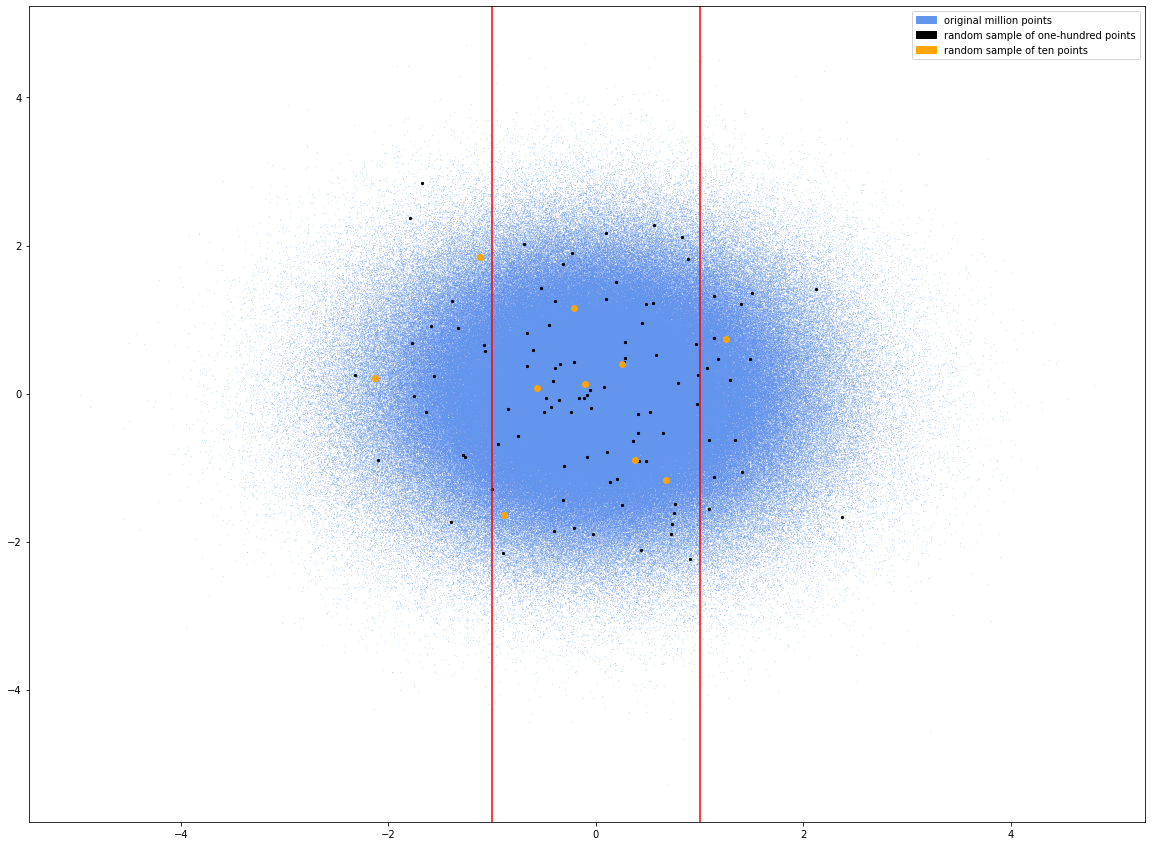

In [22]:
plt.figure(figsize=(20,15))
plt.scatter(pop_million_points[:,0], pop_million_points[:,1], s=.01, color='cornflowerblue')
plt.scatter(sample100[:, 0], sample100[:,1], color='black', s=5)
plt.scatter(sample10[:,0], sample10[:,1], color='orange', s=35)
plt.axvline(x=-1, color='red')
plt.axvline(x=1, color='red')

blue_patch = mpatches.Patch(color='cornflowerblue', label='original million points')
black_patch = mpatches.Patch(color='black', label='random sample of one-hundred points')
orange_patch = mpatches.Patch(color='orange', label='random sample of ten points')
plt.legend(handles=[blue_patch, black_patch, orange_patch])

# plt.text(-.85, 4, f'{under_1_std_100}% of 100-sample is within one', fontsize=12)
# plt.text(-.85, 3.75, 'standard deviation of the mean', fontsize=12)

# plt.text(-.85, -3.75, f'{under_1_std_10*10}% of 10-sample is within one', fontsize=12, color='darkorange')
# plt.text(-.85, -4, 'standard deviation of the mean', fontsize=12, color='darkorange')

# plt.text(-5, 1, f'{under_1_pop/10000}% of population is within one', fontsize=12, color='cornflowerblue')
# plt.text(-5, .75, 'standard deviation of the mean', fontsize=12, color='cornflowerblue')

plt.show()

# Display of the x-values' distribution from the one million original points. It approximates a Normal distribution (followed by a number line of just the x-axis, more difficult to visualize).

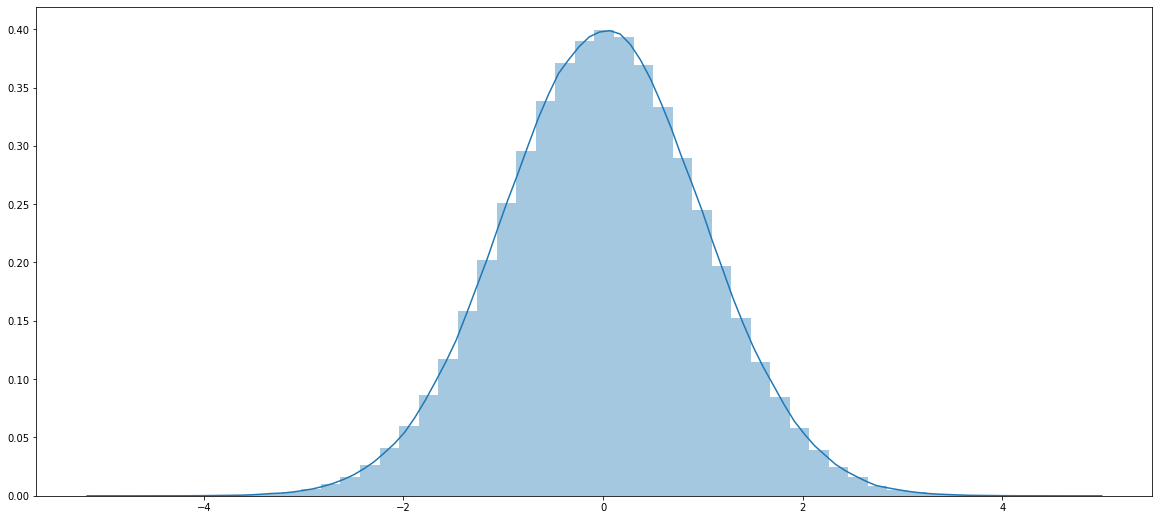

In [51]:
plt.figure(figsize=(20,9))
sns.distplot(pop_million_points[:,0])
plt.show()

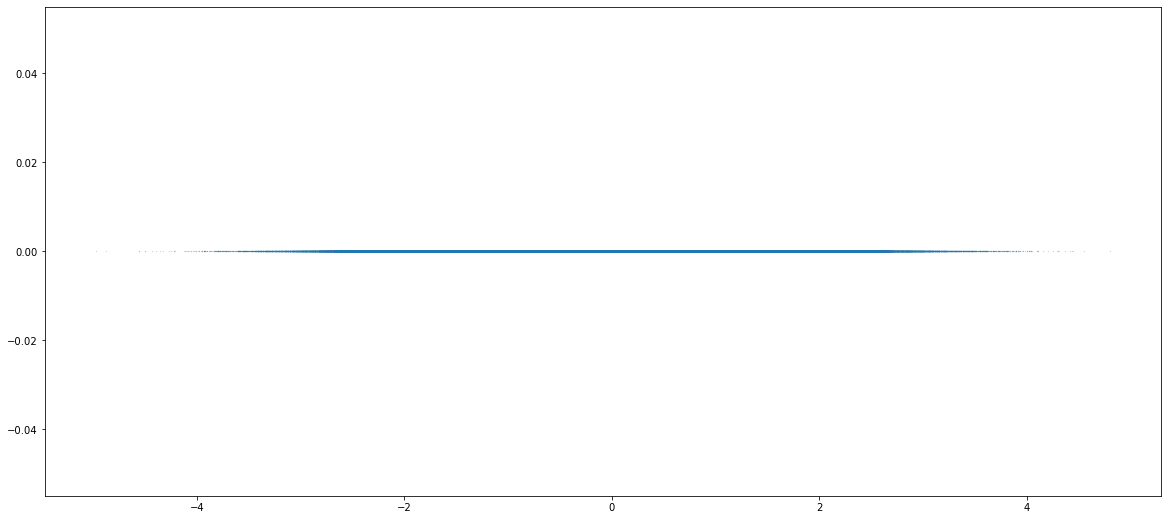

In [23]:
plt.figure(figsize=(20,9))
plt.scatter(pop_million_points[:,0], np.zeros(1000000), s=.01)
plt.show()